In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
from pingouin import multivariate_normality

sns.set_style('whitegrid')

# Homework 5
Gabrial Erismann

## Exercise 1

In [2]:
df = pd.read_csv('data/MV_data.txt',sep= ' ')

In [3]:
print(F'The number of observations is {len(df)}')
print(F'The number of dimensions of X is {len(df.columns)}')

The number of observations is 300
The number of dimensions of X is 3


## Exercise 2

In [4]:
print(F'The sample mean of each variable are \n{df.mean()}')
print(F'The sample standard deviation of each variable are \n{np.sqrt(df.var())}')

The sample mean of each variable are 
X1    3.078170
X2   -5.795116
X3    0.769141
dtype: float64
The sample standard deviation of each variable are 
X1     6.025875
X2    18.061599
X3     3.004305
dtype: float64


# Exercise 3
I don't know what marginals are, but the histogram approximations of the pdf look normal in all three cases.

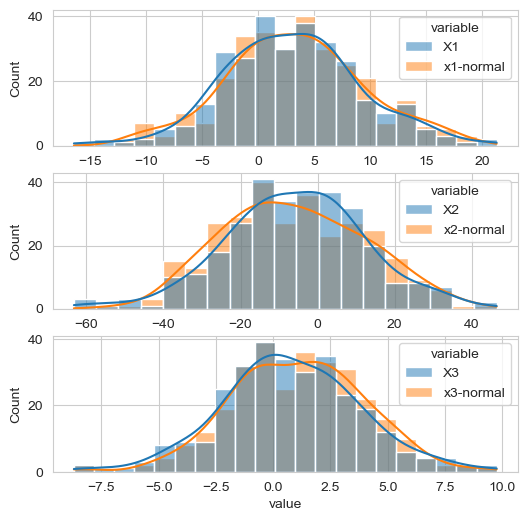

In [5]:
# get the three gaussian distributions
means = df.mean()
stds = np.sqrt(df.var())
x1 = pd.DataFrame(np.random.normal(means[0],stds[0],300))
x2 = pd.DataFrame(np.random.normal(means[1],stds[1],300))
x3 = pd.DataFrame(np.random.normal(means[2],stds[2],300))
normals = pd.concat([x1,x2,x3],axis =1)
normals.columns = ['x1-normal','x2-normal','x3-normal']

# concat into longform dataframe for graphing
df_ = pd.concat([df,normals],axis=1)
melted = pd.melt(df_)

# graph using pyplot / seaborn
fig,axs = plt.subplots(3,1,figsize=(6,6))
mydata = melted[(melted.variable=='X1') | (melted.variable == 'x1-normal')]
sns.histplot(mydata,x='value',hue='variable',ax=axs[0],kde=True)
mydata = melted[(melted.variable=='X2') | (melted.variable == 'x2-normal')]
sns.histplot(mydata,x='value',hue='variable',ax=axs[1],kde=True)
mydata = melted[(melted.variable=='X3') | (melted.variable == 'x3-normal')]
sns.histplot(mydata,x='value',hue='variable',ax=axs[2],kde=True)
plt.show()

# Exercise 4
1) 
Based on the fit, I am comfortable concluding the data is normal in each case.

2) 
Since each $X_i$ is normally distributed it is tempting to say that $X$ is normally distributed, that is $$X \sim N_3(\mu,\Sigma) \, for \, \mu = \mathbb{E}X =(\mathbb{E}X_1,\mathbb{E}X_2, \mathbb{E}X_3)^T \,and\, \Sigma = \mathbb{E}[(X_i-\mu_i)(X_j-\mu_j)] = Cov[X_i,X_j]$$ for i,j in (1,2,3).

Unfortunately, this is not the case necessarily even if all components are normally distributed. One definition of a multivariate random normal variable is that a linear combination of these variables is also normally distributed, in this case $ X\sim N_3(\mu,\Sigma)\, if \,Y= aX_1 +bX_2 + cX_3 \sim N(\mu,\Sigma)$

Some ways to test are the Shapiro-Wilk normality test or the Henze-Zirkler Multivariate Normality Test. The latter, available via the pingouin library, is used below and suggests the that $X$ is __not__ normally distributed.

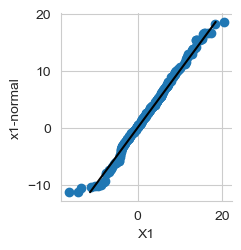

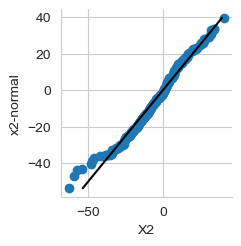

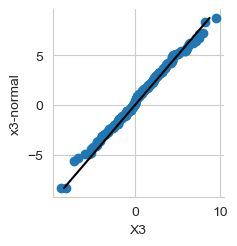

In [6]:
pplot(df_, x="X1", y="x1-normal", kind='qq',display_kws={"identity":True})
pplot(df_, x="X2", y="x2-normal", kind='qq',display_kws={"identity":True})
pplot(df_, x="X3", y="x3-normal", kind='qq',display_kws={"identity":True})
plt.show()

In [7]:
# check multivarite normality with Henze-Zirkler Test for Multivariate Normality
multivariate_normality(df)

HZResults(hz=16.114702736999174, pval=5.438522903641172e-69, normal=False)

In [8]:
# first attempt to resample from the kde of the underlying distribution.


#from scipy import stats as s
#from scipy.special import rel_entr
#kde_1 = s.gaussian_kde(df.transpose())
#resample = kde_1.resample(300)
#res = pd.DataFrame(resample)
#res = res.transpose()
#data = (pd.DataFrame.to_numpy(df)).transpose()


# Exercise 5

In [9]:
# get mean and cov matrix
a = pd.DataFrame.cov(df)
b= df.mean()
# get list of [eigenvalues,eigenvectors]
eigens = np.linalg.eig(a)

In [10]:
eigens[0]
eigens[1]

array([[ 0.01894979,  0.99304933,  0.11616337],
       [ 0.99979069, -0.01971706,  0.00545947],
       [-0.00771192, -0.1160356 ,  0.99321512]])